<a href="https://colab.research.google.com/github/dheerajkumar5/Salary-Predictor/blob/main/Salary_Predictor_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error, mean_squared_error

In [4]:
df = pd.read_csv("Salary_Prediction_Dataset.csv")

In [5]:
df.shape #Shape of the dataset

(10000, 2)

In [6]:
df.columns

Index(['Experience (Years)', 'Salary ($)'], dtype='object')

In [7]:
df.columns = ['Experience','Salary'] #Update column names as per the need

In [8]:
df.columns

Index(['Experience', 'Salary'], dtype='object')

In [9]:
df.head()

,Experience,Salary
0,38,91086.64610
1,28,86539.36189
2,14,58350.31723
3,7,24551.81574
4,20,83345.07550


In [10]:
df.isnull().sum()

,0
Experience,0
Salary,0


In [11]:
df.describe()

,Experience,Salary
count,10000.000000,10000.000000
mean,20.017200,76312.562432
std,11.720556,44663.140412
min,0.000000,20000.000000
25%,10.000000,37578.733370
50%,20.000000,70747.965835
75%,30.000000,106772.785425
max,40.000000,219020.102300


<ipython-input-12-c295d2895934>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Experience'])


<Axes: xlabel='Experience', ylabel='Density'>

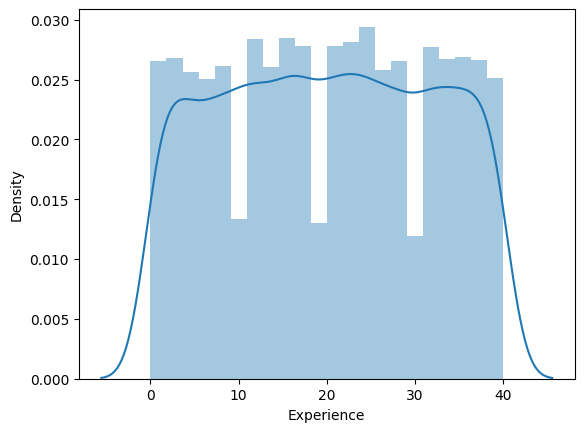

In [12]:
sns.distplot(df['Experience'])

In [13]:
df['Experience'].kurt()

np.float64(-1.1748129333429957)

<Axes: ylabel='Experience'>

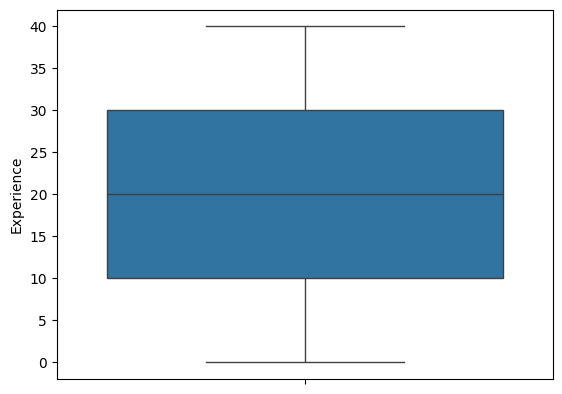

In [14]:
sns.boxplot(df['Experience'])

The dataset exhibits negative kurtosis (-1.1748129333429957), indicating a distribution that is less peaked and has lighter tails than a normal distribution. This suggests the data has fewer extreme values or outliers.

<ipython-input-15-bc20e5e6d548>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Salary'])


<Axes: xlabel='Salary', ylabel='Density'>

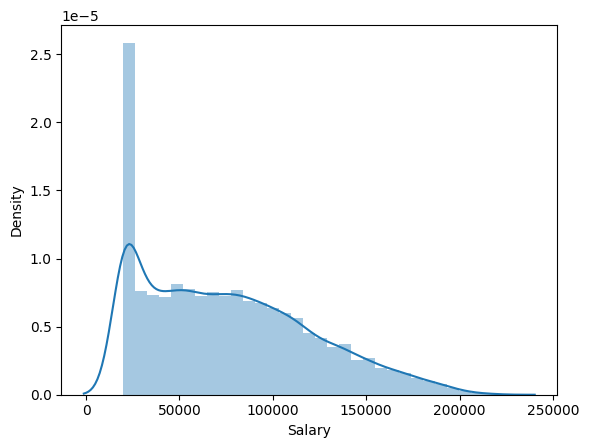

In [15]:
sns.distplot(df['Salary'])

The dataset exhibits positive (right) skewness, indicating the presence of higher outlier values.


In [16]:
df['Salary'].skew()

np.float64(0.5759602839218919)

<Axes: ylabel='Salary'>

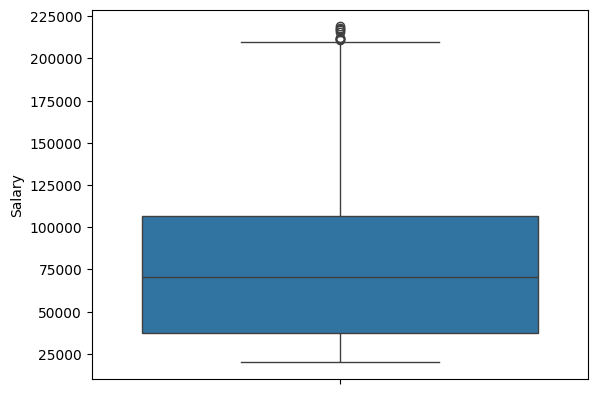

In [17]:
sns.boxplot(df['Salary'])

<Axes: >

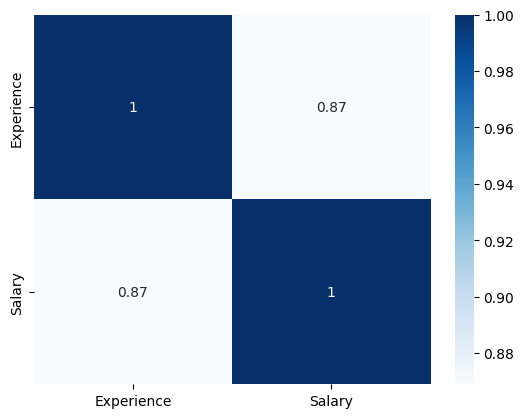

In [18]:
sns.heatmap(df[['Experience','Salary']].corr(), annot= True, cmap = "Blues")

The correlation between Experience and Salary is 0.87, indicating a strong positive relationship. As experience increases, salary tends to rise significantly. This suggests that experience plays a key role in determining salary levels, which can be valuable for predictive modeling or workforce analysis.


<Axes: xlabel='Experience', ylabel='Salary'>

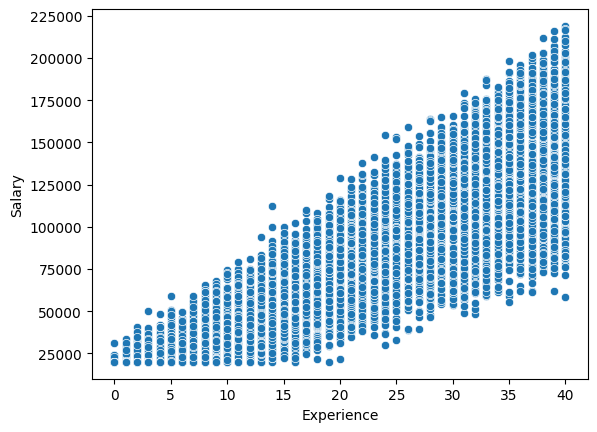

In [19]:
sns.scatterplot(x = 'Experience', y = 'Salary', data = df)

The scatter plot indicates a strong positive linear relationship between the x and y variables. As the x variable increases, the y variable consistently rises, suggesting a direct correlation. This trend can be useful for predictive modeling and trend analysis.

In [20]:
x = df.drop(columns = ['Salary'])
y = df['Salary']

In [21]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size = 0.20, random_state = 42)

In [22]:
LR_model = LinearRegression() #LinearRegression_Model

In [23]:
LR_model.fit(xtrain, ytrain)

LinearRegression()

In [24]:
LR_Prediction = LR_model.predict(xtest)

In [25]:
mean_squared_error(ytest, LR_Prediction)

508257823.33401406

In [26]:
root_mean_squared_error(ytest, LR_Prediction)

22544.574143993363

In [27]:
mean_absolute_error(ytest, LR_Prediction)

17144.520971930026

In [28]:
LR_score = r2_score(ytest, LR_Prediction)
LR_score

0.7509357953146204

In [29]:
RF_model = RandomForestRegressor() #RandomForestRegressor_Model

In [30]:
RF_model.fit(xtrain, ytrain)

RandomForestRegressor()

In [31]:
RF_Prediction = RF_model.predict(xtest)

In [32]:
RF_score = r2_score(ytest, RF_Prediction)
RF_score

0.7538384174457632

The R² score for the Linear Regression model is 0.7509, while the Random Forest model achieves a slightly higher score of 0.7539. This indicates that both models perform similarly well in explaining the variance in the target variable, with Random Forest having a slight edge. Further tuning or evaluation may be needed to determine the best fit for the dataset.


In [33]:
root_mean_squared_error(ytest, RF_Prediction)

22412.82065575701

In [34]:
mean_absolute_error(ytest, RF_Prediction)

16642.23767435505

In [35]:
mean_squared_error(ytest, RF_Prediction)

502334529.74712795

In [36]:
Ridge = Ridge()

In [37]:
Ridge.fit(xtrain, ytrain)

Ridge()

In [38]:
Ridge_Prediction = Ridge.predict(xtest)

In [39]:
Ridge_score = r2_score(ytest, Ridge_Prediction)
Ridge_score

0.7509358008143093

In [40]:
Lasso = Lasso()

In [41]:
Lasso.fit(xtrain, ytrain)

Lasso()

In [42]:
Lasso_prediction = Lasso.predict(xtest)

In [43]:
Lasso_score = r2_score(ytest, Lasso_prediction)
Lasso_score

0.7509358085899852

Both Lasso and Ridge Regression models also achieve an R² score of 0.7509, similar to Linear Regression. This indicates that the simpler regression models capture the variance equally well, while Random Forest provides a marginally improved fit. Further analysis, such as feature importance or hyperparameter tuning, may help refine the model selection.


In [44]:
df1 = df

In [45]:
df1.head()

,Experience,Salary
0,38,91086.64610
1,28,86539.36189
2,14,58350.31723
3,7,24551.81574
4,20,83345.07550


In [57]:
scaler = RobustScaler()

In [58]:
df1['Salary_scaled'] = scaler.fit_transform(df1[['Salary']])

<ipython-input-59-214fdb36f86d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['Salary_scaled'])


<Axes: xlabel='Salary_scaled', ylabel='Density'>

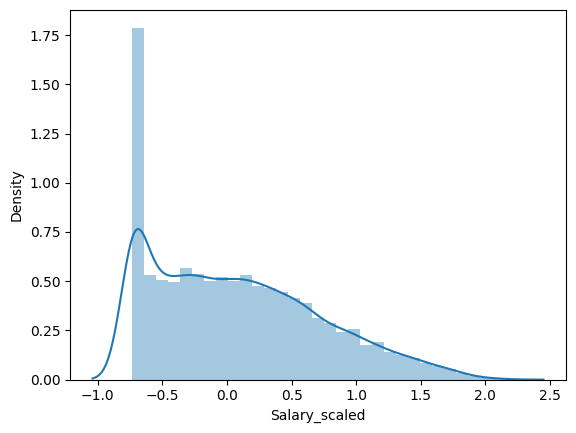

In [59]:
sns.distplot(df1['Salary_scaled'])

In [60]:
x1 = df1.drop(columns = ['Salary','Salary_scaled'])
y1 = df1['Salary_scaled']

In [61]:
X1test, X1train, Y1test, Y1train = train_test_split(x1,y1,test_size = 0.20, random_state = 42)

In [62]:
LR_model.fit(X1train, Y1train)

LinearRegression()

In [63]:
LR_Scaled_Prediction = LR_model.predict(X1test)

In [64]:
LR_Scaled_Score = r2_score(Y1test, LR_Scaled_Prediction)
LR_Scaled_Score

0.7556702183516971

In [65]:
RF_model.fit(X1train, Y1train)

RandomForestRegressor()

In [66]:
RF_Scaled_Prediction = RF_model.predict(X1test)

In [67]:
RF_Scaled_Score = r2_score(Y1test, RF_Scaled_Prediction)
RF_Scaled_Score

0.7514640707560152